In [ ]:
%tensorflow_version 2.x
import tensorflow as tf

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [ ]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
df = df.dropna()

In [ ]:
origin = df.pop('Origin')
df['USA'] = (origin == 1)*1
df['Europe'] = (origin == 2)*1
df['Japan'] = (origin == 3)*1

In [ ]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [ ]:
train = df.sample(frac = 0.8,random_state = 0)
test = df.drop(train.index)

In [ ]:
print(df.shape,train.shape,test.shape)

(392, 10) (314, 10) (78, 10)


In [ ]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
train_features = train.copy()
test_features = test.copy()

train_label = train_features.pop('MPG')
test_label = test_features.pop('MPG')

In [ ]:
def plot(feature,x=None,y=None):
  plt.figure(figsize=(10,8))
  plt.scatter(train_features[feature],train_label,label = 'Data')
  if x is not None and y is not None:
    plt.plot(x, y, color='k', label='Predictions')
  plt.xlabel(feature)
  plt.ylabel('MPG')
  plt.legend()

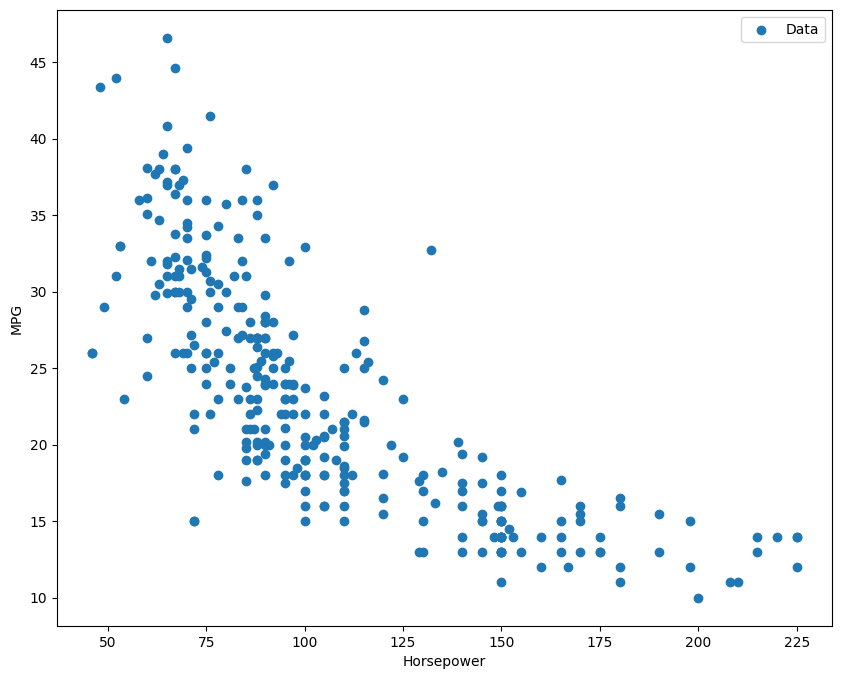

In [ ]:
plot('Horsepower')

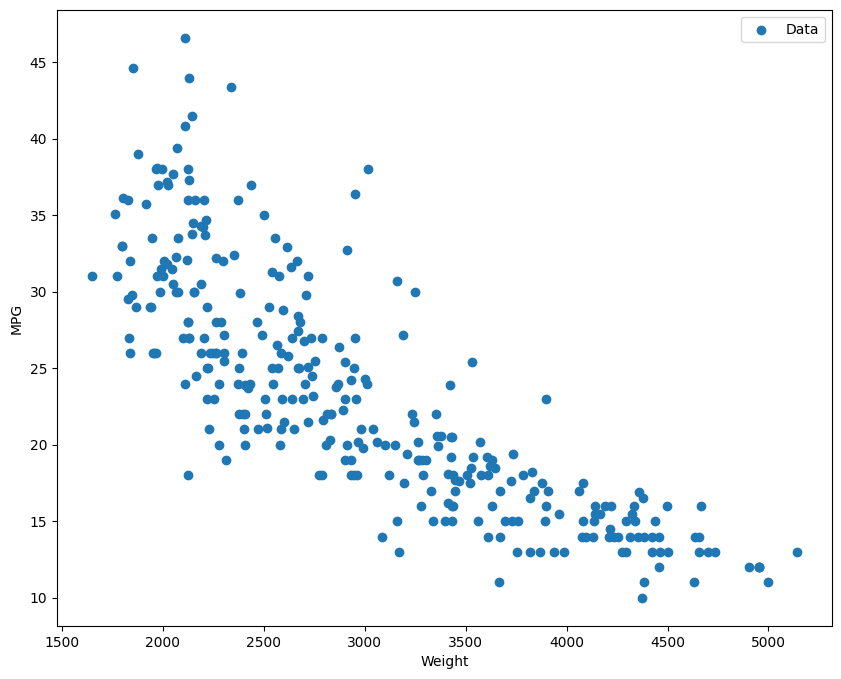

In [ ]:
plot('Weight')

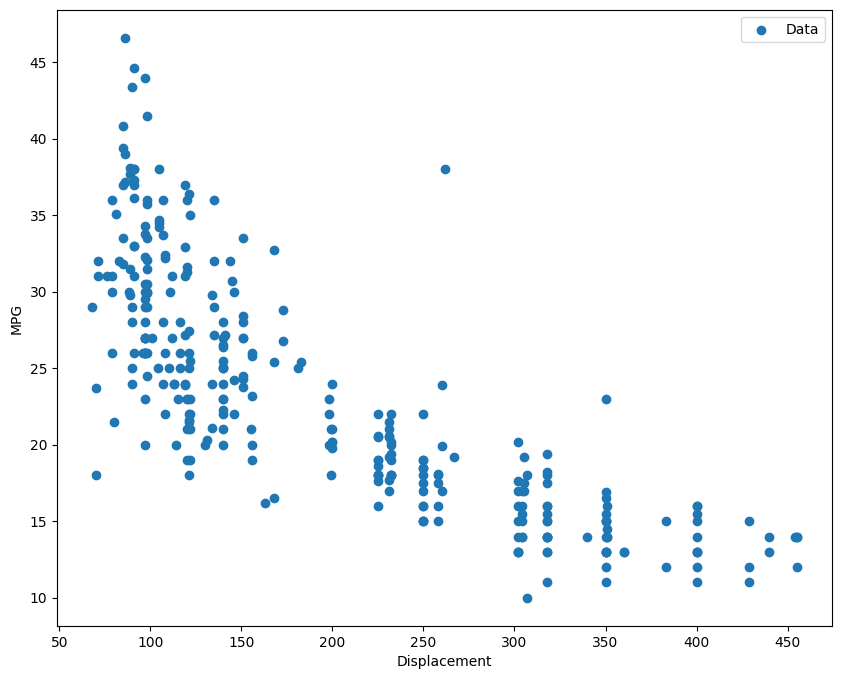

In [ ]:
plot('Displacement')

In [ ]:
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))

In [ ]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])


In [ ]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29 (120.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [ ]:
linear_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss=loss)
fitting = linear_model.fit(train_features, train_label, epochs=100, verbose=1, validation_split=0.2)
linear_model.evaluate(test_features, test_label, verbose=1)

Epoch 1/100
8/8 [==============================] - 1s 25ms/step - loss: 2.5613 - val_loss: 2.5004
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 2.5388 - val_loss: 2.4833
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 2.5364 - val_loss: 2.4726
Epoch 4/100
8/8 [==============================] - 0s 9ms/step - loss: 2.5288 - val_loss: 2.6137
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 2.4992 - val_loss: 2.4793
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 2.5116 - val_loss: 2.5033
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 2.4667 - val_loss: 2.4660
Epoch 8/100
8/8 [==============================] - 0s 10ms/step - loss: 2.4738 - val_loss: 2.4795
Epoch 9/100
8/8 [==============================] - 0s 9ms/step - loss: 2.4657 - val_loss: 2.4772
Epoch 10/100
8/8 [==============================] - 0s 8ms/step - loss: 2.4753 - val_loss: 2.4705
Epoch 11/100
8/8 [=========

2.518906831741333